In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as dt

In [2]:
def timedelta_to_years(timedelta_obj):
    """
    Converts a timedelta object to years, considering leap years.
    
    Args:
    timedelta_obj (timedelta): The timedelta object to convert.
    
    Returns:
    float: The number of years represented by the timedelta.
    """
    return timedelta_obj.total_seconds() / (365.25 * 24 * 3600)

In [2]:
raw_df = pd.read_csv('Street_Tree_List-2022-01-30_RAW.csv')

/var/folders/_z/q4gsch7n2jn4pky14jnx_2p80000gn/T/ipykernel_15635/2369139782.py:1: DtypeWarning: Columns (1,2,3,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('Street_Tree_List-2022-01-30_RAW.csv')


In [7]:
dates = pd.to_datetime(raw_df['PlantDate'], format='%m/%d/%y %H:%M')


In [19]:
dates_df = pd.read_csv('Monthly_Street_Tree_Counts-2022-01-30_FILTERED.csv')
# dates_df.PlantDate = pd.to_datetime(dates_df['PlantDate'])

In [20]:
dates_df

Month  Count
0       8   1191
1       7   1891
2       4   1508
3       6   1793
4      11   1218
5      10   1426
6       1   1421
7       2   1351
8       3   1632
9      12   1405
10      9    895
11      5   1493

AttributeError: 'str' object has no attribute 'month'

<Axes: >

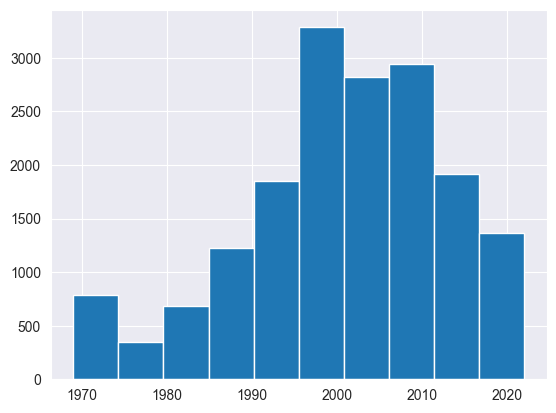

In [49]:
dates_df.Year.hist()

<Axes: xlabel='PlantDate'>

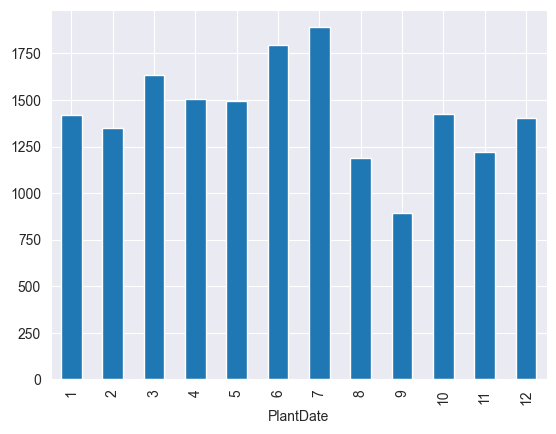

In [41]:
# filtered_dates_df = dates_df[dates_df.PlantDate.dt.year > 2010] 

dates_df.PlantDate.dt.month.value_counts().sort_index().plot(kind='bar')

In [23]:
dates_df['PlantDate'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [3]:
df = pd.read_csv("Street_Tree_List-2022-01-30_FILTERED.csv")
replacement_date = pd.Timestamp('1955-01-01')
df['PlantDate'] = df['PlantDate'].fillna(replacement_date)
df['PlantDate'] = pd.to_datetime(df['PlantDate'], format='%m/%d/%y %H:%M')
df['PlantAge'] = dt.datetime.now() - df['PlantDate']
df['PlantAge'] = df['PlantAge'].apply(lambda x: timedelta_to_years(x))

In [3]:
# data from https://www.weather.gov/wrh/climate?wfo=mtr
weather_df = pd.read_csv("SF_weather_data.csv")
weather_df.drop(index=12, inplace=True)

In [4]:
weather_df

Month  Total Precipitation Normal (inches)  \
0     January                                 4.40   
1    February                                 4.37   
2       March                                 3.15   
3       April                                 1.60   
4         May                                 0.70   
5        June                                 0.20   
6        July                                 0.01   
7      August                                 0.06   
8   September                                 0.10   
9     October                                 0.94   
10   November                                 2.60   
11   December                                 4.76   

    Mean Max Temperature Normal (°F)  Mean Min Temperature Normal (°F)  \
0                               57.8                              46.6   
1                               60.4                              47.9   
2                               62.1                              48.9   
3                               63.0                              49.7   
4                               64.1                              51.4   
5                               66.5                              53.0   
6                               66.3                              54.4   
7                               67.9                              55.5   
8                               70.2                              55.6   
9                               69.8                              54.4   
10                              63.7                              50.7   
11                              57.9                              47.0   

    Mean Avg Temperature Normal (°F)  
0                               52.2  
1                               54.2  
2                               55.5  
3                               56.4  
4                               57.8  
5                               59.7  
6                               60.3  
7                               61.7  
8                               62.9  
9                               62.1  
10                              57.2  
11                              52.5

In [13]:
def format_weather_df(df, col):
    weather_df = df[['Month', col]].copy() 
    weather_df = weather_df.rename(columns={col: 'Count'})
    
    return weather_df

In [14]:
format_weather_df(weather_df, 'Mean Avg Temperature Normal (°F)')


Month  Count
0     January   52.2
1    February   54.2
2       March   55.5
3       April   56.4
4         May   57.8
5        June   59.7
6        July   60.3
7      August   61.7
8   September   62.9
9     October   62.1
10   November   57.2
11   December   52.5

In [98]:
filtered_df = df[(df['PlantDate'].dt.year > 1955) & (df['PlantDate'].dt.year < 2025)]

In [99]:
filtered_df.columns

Index(['TreeID', 'qLegalStatus', 'qSpecies', 'qAddress', 'SiteOrder',
       'qSiteInfo', 'qCaretaker', 'PlantDate', 'DBH', 'PlotSize', 'Latitude',
       'Longitude', 'PlantAge'],
      dtype='object')

In [44]:
weather_df.columns

Index(['Month', 'Total Precipitation Normal (inches)',
       'Mean Max Temperature Normal (°F)', 'Mean Min Temperature Normal (°F)',
       'Mean Avg Temperature Normal (°F)'],
      dtype='object')

In [43]:
weather_df

Month  Total Precipitation Normal (inches)  \
0     January                                 4.40   
1    February                                 4.37   
2       March                                 3.15   
3       April                                 1.60   
4         May                                 0.70   
5        June                                 0.20   
6        July                                 0.01   
7      August                                 0.06   
8   September                                 0.10   
9     October                                 0.94   
10   November                                 2.60   
11   December                                 4.76   

    Mean Max Temperature Normal (°F)  Mean Min Temperature Normal (°F)  \
0                               57.8                              46.6   
1                               60.4                              47.9   
2                               62.1                              48.9   
3                               63.0                              49.7   
4                               64.1                              51.4   
5                               66.5                              53.0   
6                               66.3                              54.4   
7                               67.9                              55.5   
8                               70.2                              55.6   
9                               69.8                              54.4   
10                              63.7                              50.7   
11                              57.9                              47.0   

    Mean Avg Temperature Normal (°F)  
0                               52.2  
1                               54.2  
2                               55.5  
3                               56.4  
4                               57.8  
5                               59.7  
6                               60.3  
7                               61.7  
8                               62.9  
9                               62.1  
10                              57.2  
11                              52.5

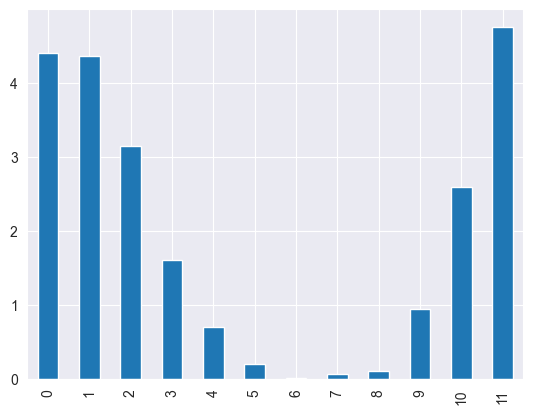

In [134]:
mean_temps = weather_df['Total Precipitation Normal (inches)']

mean_temps.plot(kind='bar')

# plt.ylim(max(mean_temps), min(mean_temps))
plt.show()

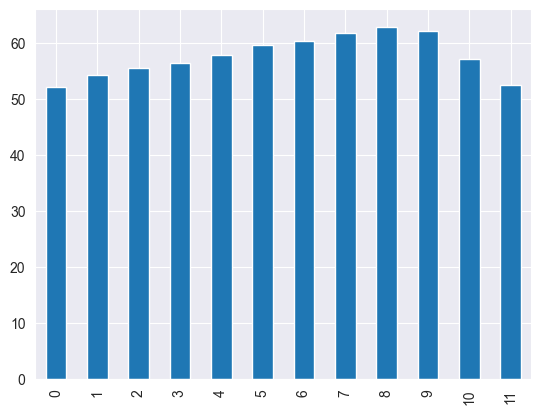

In [45]:
mean_temps = weather_df['Mean Avg Temperature Normal (°F)']

mean_temps.plot(kind='bar')

# plt.ylim(max(mean_temps), min(mean_temps))
plt.show()

In [154]:
window_size = 3
(filtered_df.PlantDate.dt.month.value_counts()).sort_index().rolling(window=window_size).mean()

PlantDate
1            NaN
2            NaN
3     952.000000
4     958.333333
5     887.666667
6     810.333333
7     799.666667
8     757.333333
9     627.666667
10    580.666667
11    595.333333
12    714.666667
Name: count, dtype: float64

<Axes: xlabel='PlantDate'>

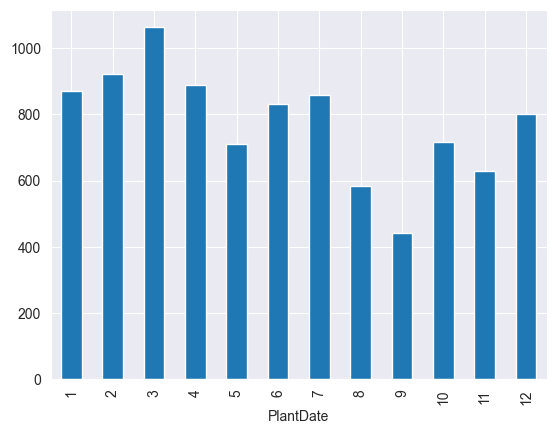

In [152]:
(filtered_df.PlantDate.dt.month.value_counts()).sort_index().plot(kind='bar')

In [139]:
species = filtered_df.qSpecies.unique()

In [146]:
top_10_species = filtered_df.qSpecies.value_counts().head(10).index.tolist()

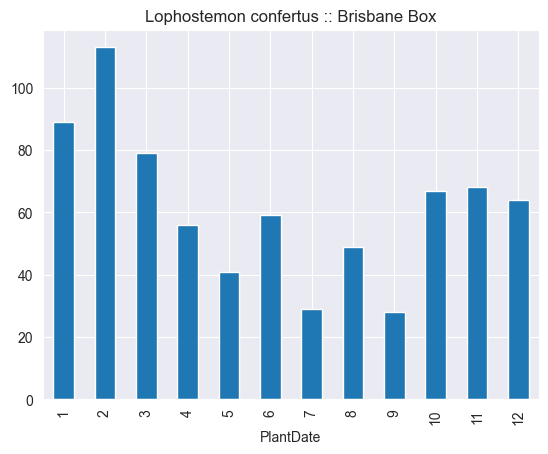

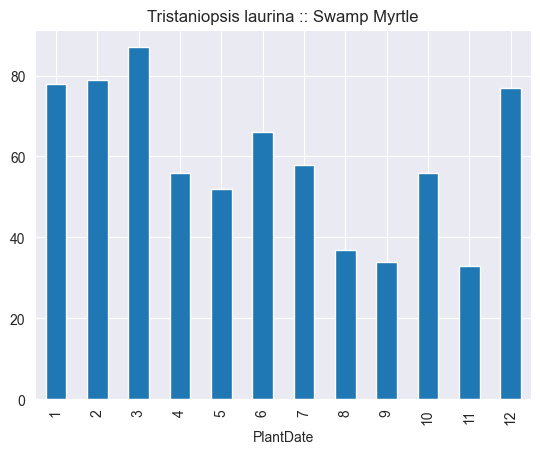

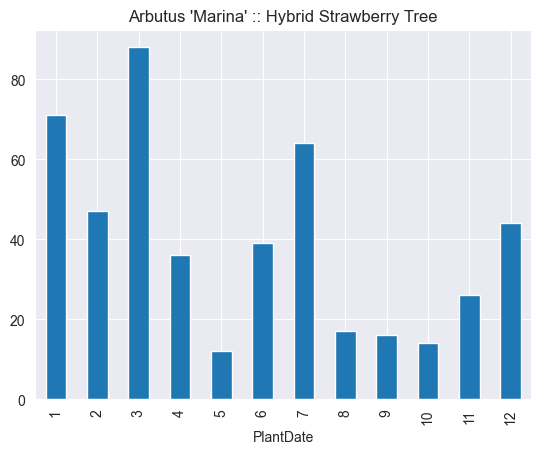

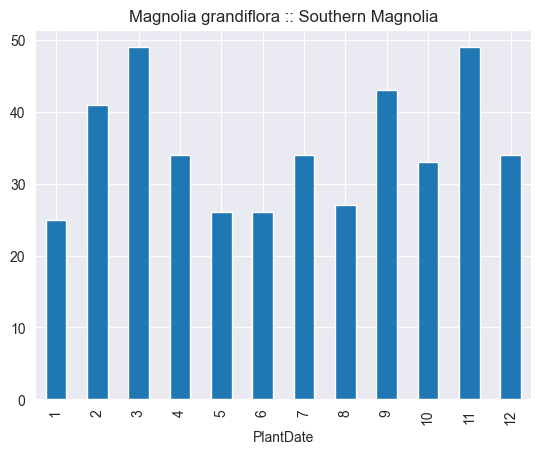

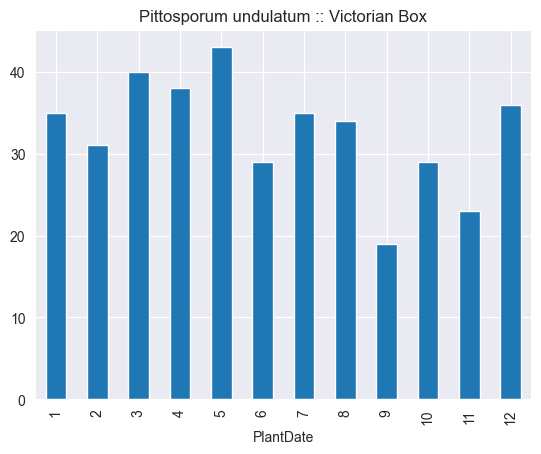

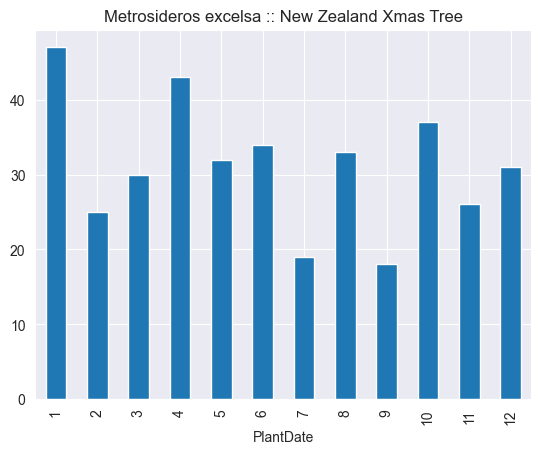

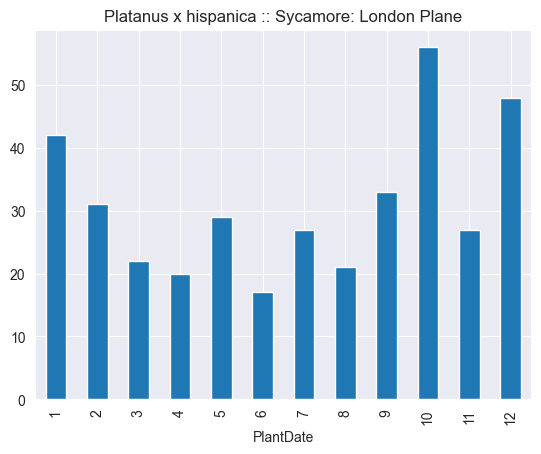

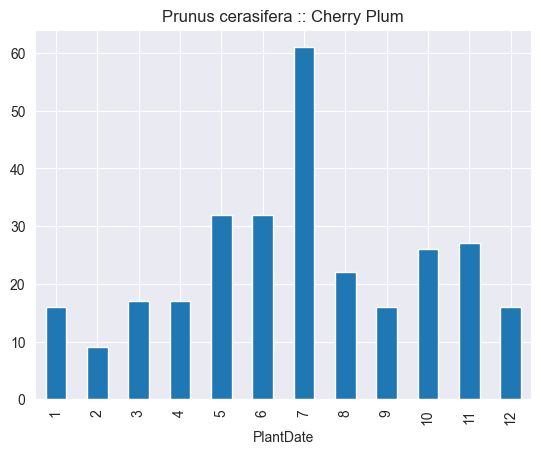

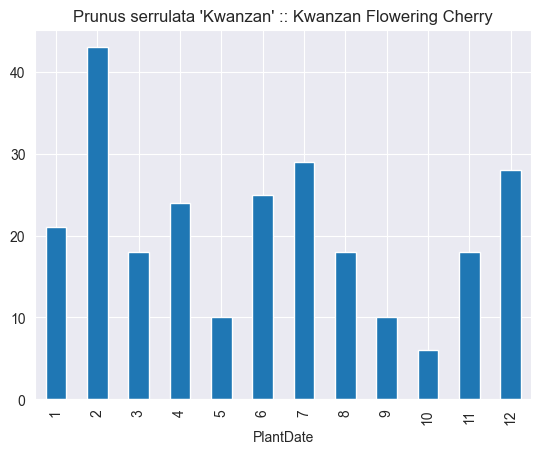

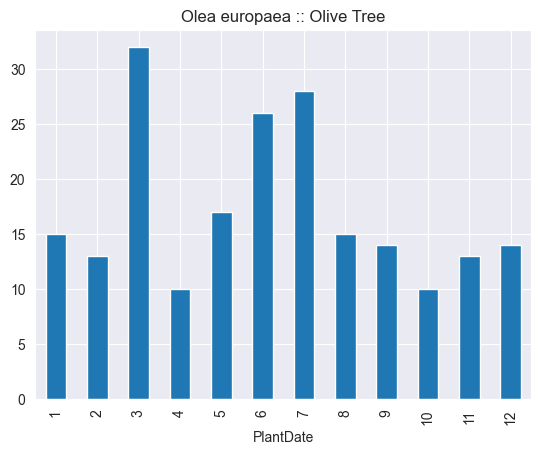

In [151]:
for specie in top_10_species:
    (filtered_df[filtered_df.qSpecies == specie].PlantDate.dt.month.value_counts()).sort_index().plot(kind='bar')
    plt.title(specie)
    plt.show()

In [103]:
plt.figure(figsize=(15, 6))
_filtered_df = filtered_df.copy()
_filtered_df = _filtered_df[_filtered_df['qCaretaker'] == "DPW"]

_filtered_df['PlantDate'].dt.weekofyear.value_counts().sort_index().plot(kind='bar')


# plt.xticks(rotation=90)
# plt.plot()

AttributeError: 'DatetimeProperties' object has no attribute 'weekofyear'

<Figure size 1500x600 with 0 Axes>

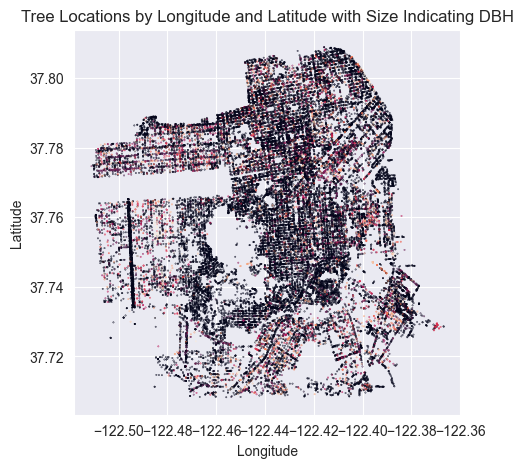

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered CSV file
tree_data_filtered = df
# Ensure DBH is numeric and drop rows with missing or invalid coordinates
tree_data_filtered['DBH'] = pd.to_numeric(tree_data_filtered['DBH'], errors='coerce')
tree_data_filtered.dropna(subset=['Latitude', 'Longitude', 'DBH'], inplace=True)

# # Plotting
plt.figure(figsize=(5, 5))

plt.scatter(
    tree_data_filtered['Longitude'], tree_data_filtered['Latitude'],
    c=tree_data_filtered.PlantDate.dt.month, s=.09,
)
plt.title('Tree Locations by Longitude and Latitude with Size Indicating DBH')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.colorbar(label='DBH (Diameter at Breast Height)')
# plt.legend()
plt.show()

# Create a hexbin chart
# plt.figure(figsize=(10, 6))
# plt.hexbin(tree_data_filtered['Longitude'], tree_data_filtered['Latitude'], gridsize=100, cmap='Greens', mincnt=1)
# plt.colorbar(label='Number of Trees')
# plt.title('Geographic Distribution of Trees (Hexbin)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


In [ ]:
# IDEA: Hex bin chart next to elevation map that has like a mountain coming off the side to depict elevation

In [64]:
elevation_df = pd.read_csv('Elevation_Contours_20240204.csv')
elevation_df.head(10).to_clipboard()

In [31]:

# # Initialize a list to store the park names for each tree
# tree_park_names = []
# 
# # Check each tree to see if it is within a park boundary
# for tree in gdf_trees.geometry:
#     in_park = False  # Flag to check if the tree is in any park
#     for _, park in parks_gdf.iterrows():
#         if tree.within(shape(park['geometry'])):
#             tree_park_names.append(park['map_park_n'])  # Use the park name field appropriate to your GeoJSON
#             in_park = True
#             break  # Stop looking if we've found the park
#     if not in_park:
#         tree_park_names.append("None")  # Use "None" if the tree is not in a park
# 
# # Add the park names as a new column to the original DataFrame
# tree_data['ParkName'] = tree_park_names
# 
# # Display the first few rows to verify
# tree_data.head()


KeyboardInterrupt: 

In [61]:
n = 10
top_species = df['qSpecies'].value_counts().head(n).index
filtered_df = df[df['qSpecies'].isin(top_species)]
filtered_df = filtered_df.dropna(subset=['PlantDate'])
filtered_df = filtered_df[filtered_df['PlantDate'] <= pd.Timestamp(dt.datetime.now())]
filtered_df = filtered_df[filtered_df['PlantAge'] < 69]


In [62]:
from sklearn.linear_model import LinearRegression
import numpy as np

def linear_regression(df, title_content, Xcol, yxol):
    # Preparing the data for linear regression
    X = df[[Xcol]]  # Independent variable
    y = df[yxol]  # Dependent variable
    
    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predicting DBH values using the model to plot the regression line
    y_pred = model.predict(X)
    
    # Calculating the coefficient of determination (R^2)
    r_squared = model.score(X, y)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, alpha=0.5)  # Actual data points
    plt.plot(X, y_pred, color='red')  # Regression line
    plt.title(f'{title_content}\nLinear Regression: Tree Size (DBH) vs. Plant Age (years)')
    plt.xlabel('Age (years)')
    plt.ylabel('Diameter at Breast Height (DBH)')
    plt.grid(True)
    print(f"R2: {r_squared}")
    
    plt.show()


R2: 0.1538120188619977


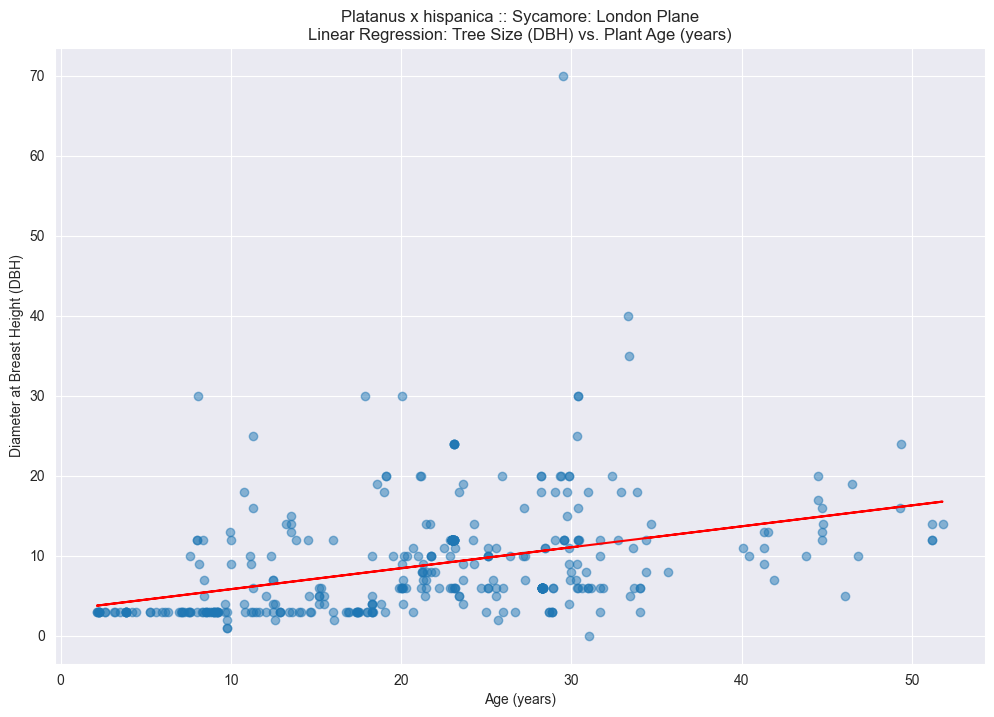

R2: 0.4110602399176261


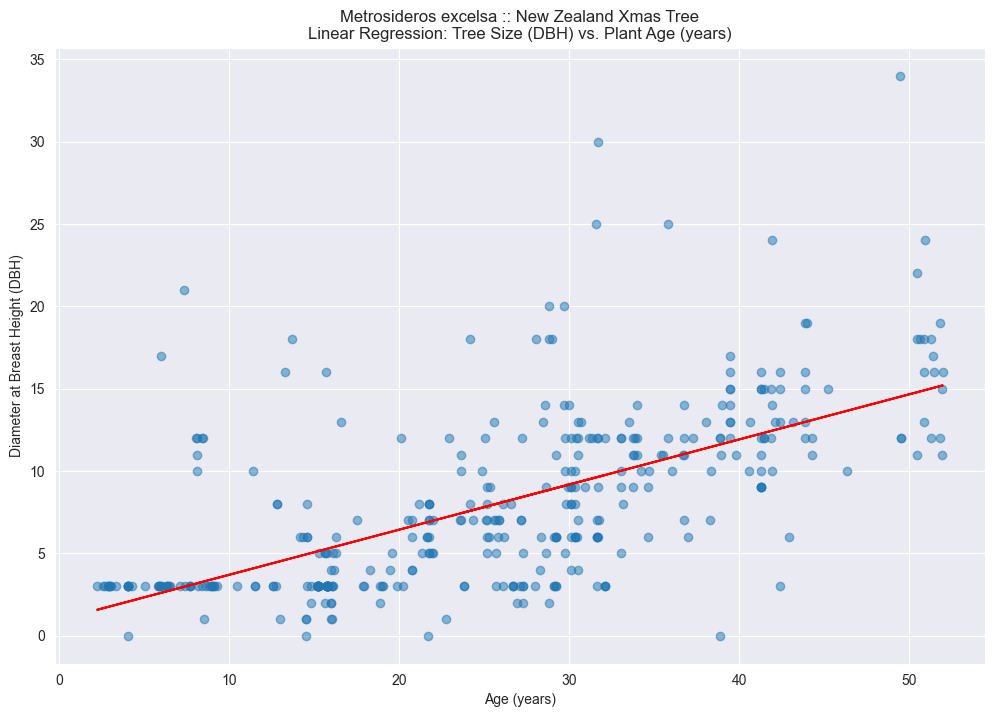

R2: 0.19063054984777894


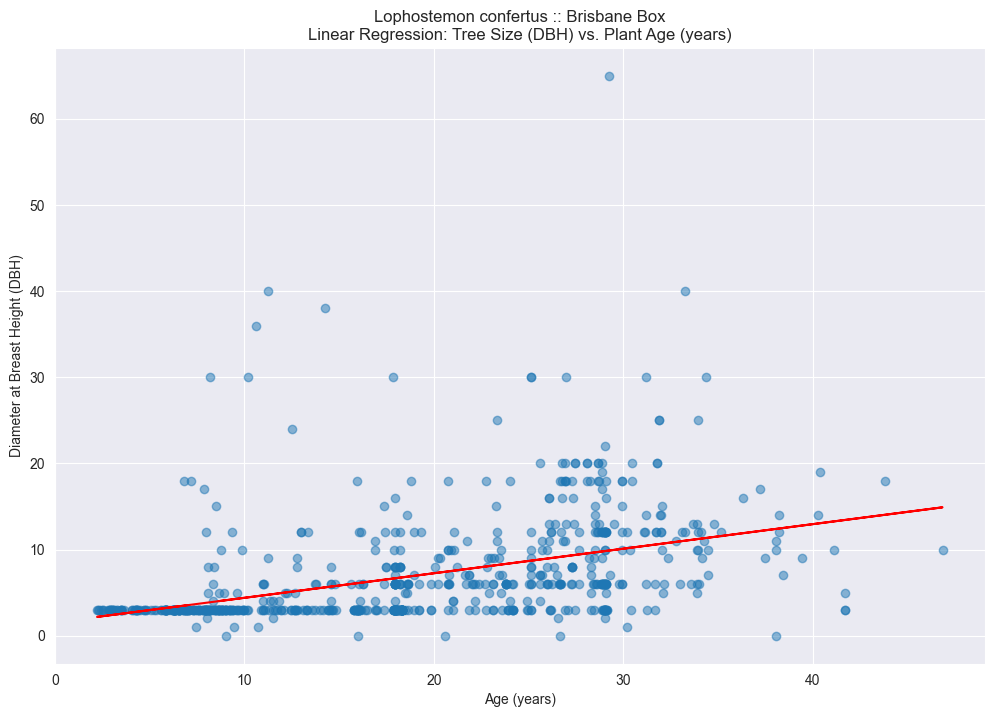

R2: 0.4643422884435201


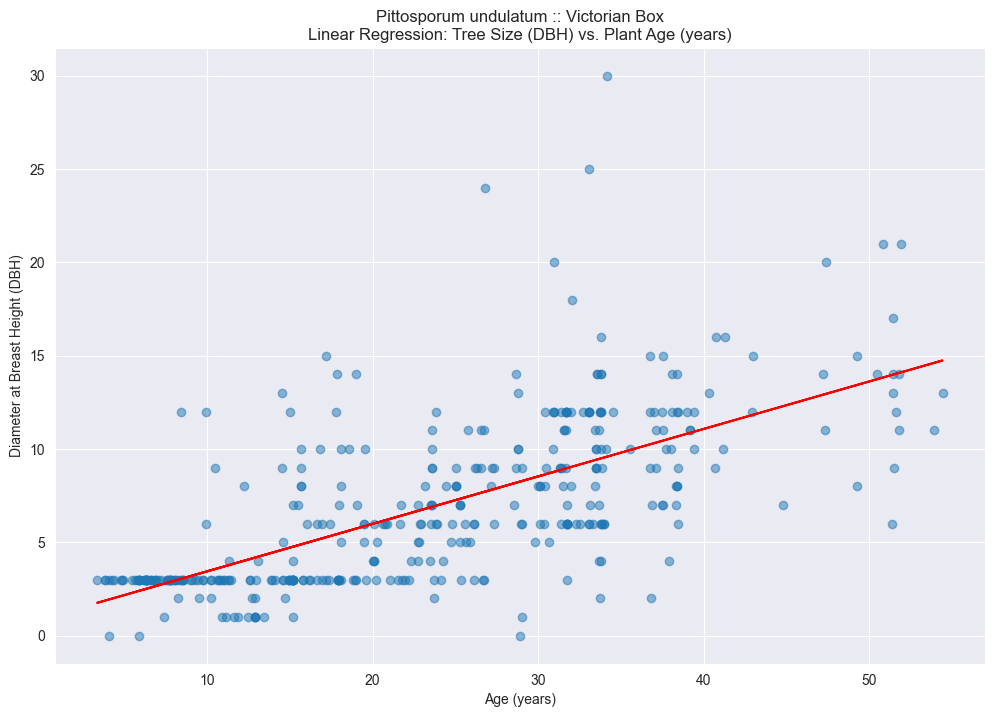

R2: 0.1556235413815915


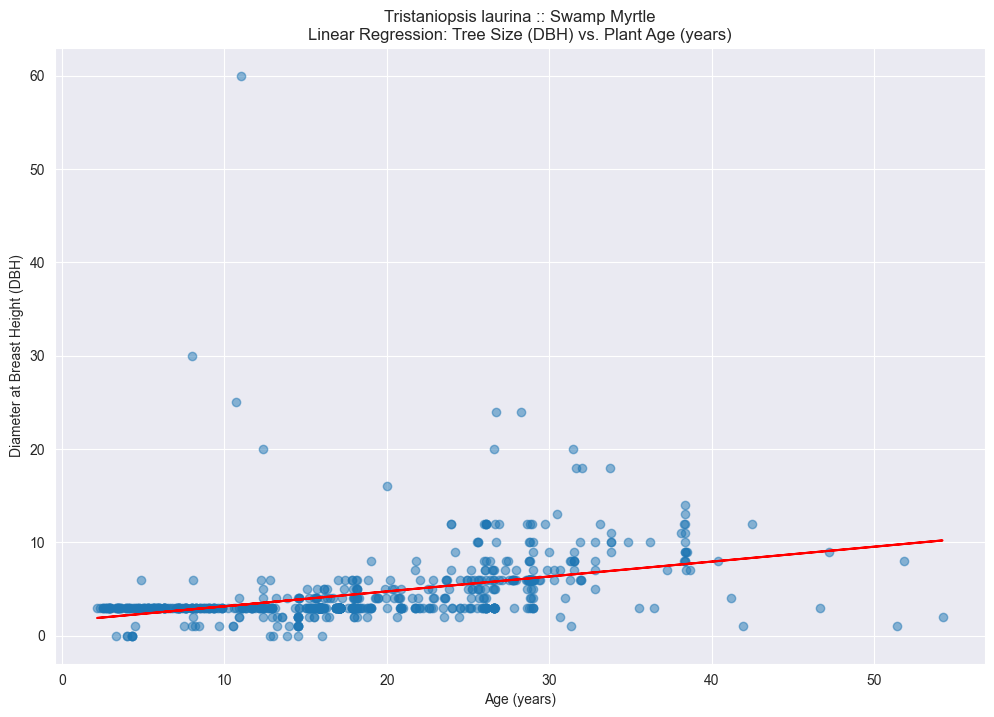

R2: 0.35951752358207634


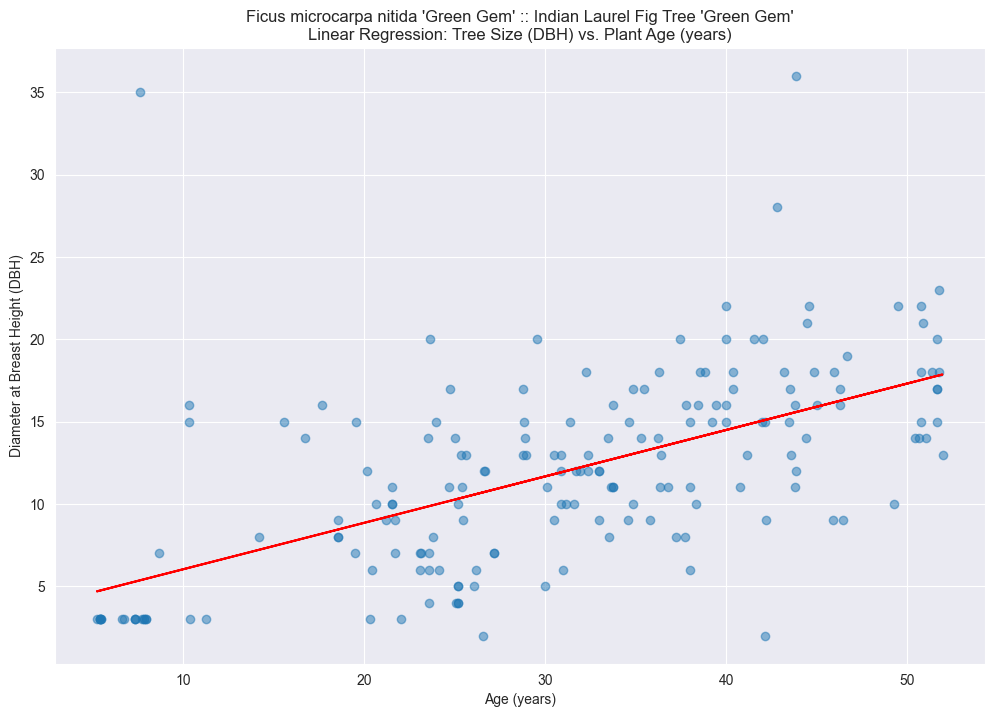

R2: 0.1328684033622044


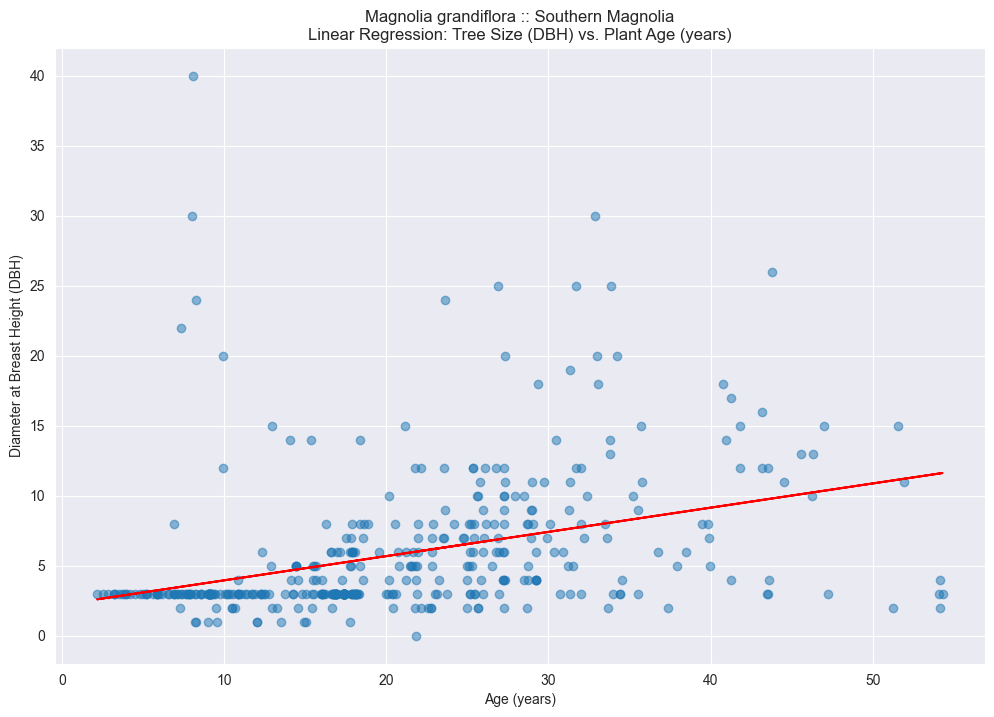

R2: 0.12230100877995742


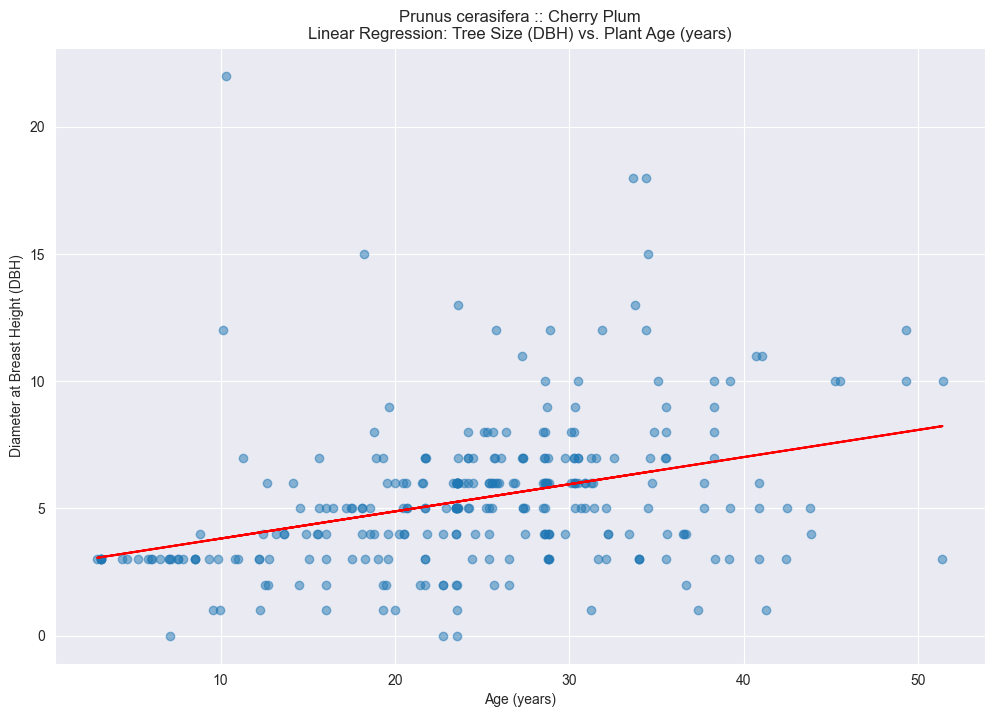

R2: 0.2362588083024716


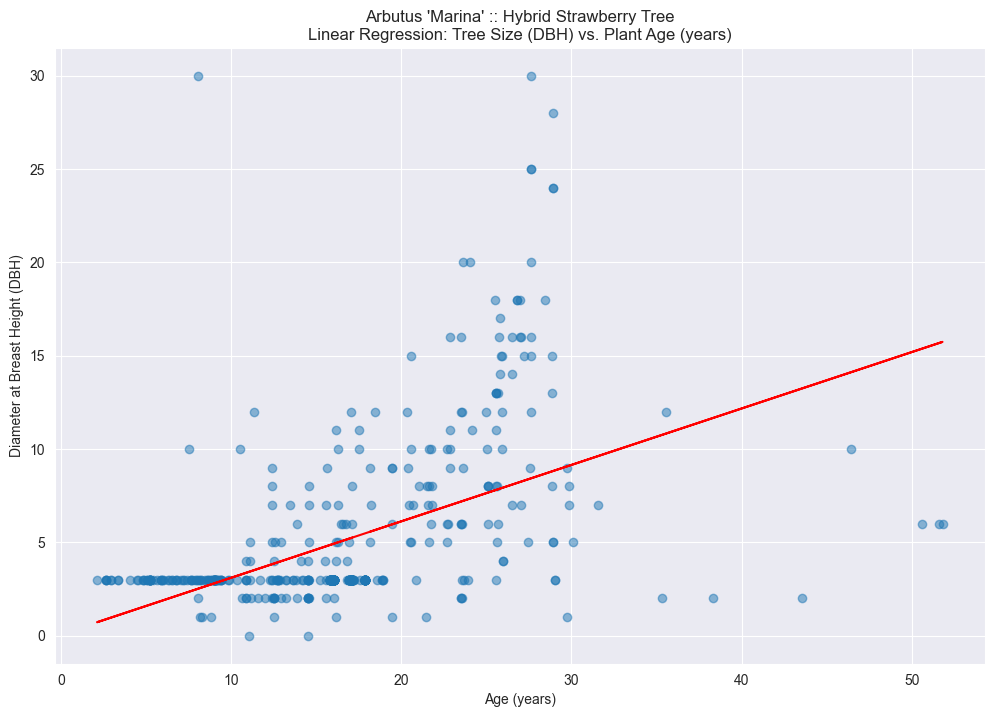

R2: 0.21068522127738787


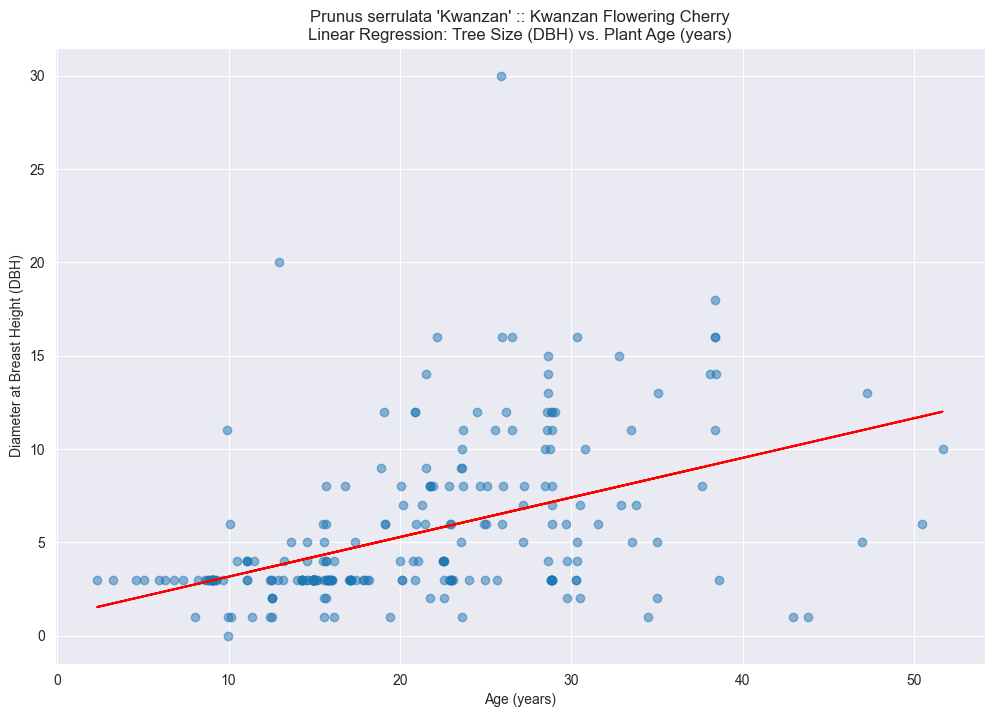

In [63]:
for species in top_species:
    _df = filtered_df[filtered_df['qSpecies'] == species]
    linear_regression(_df, species, "PlantAge", "DBH")

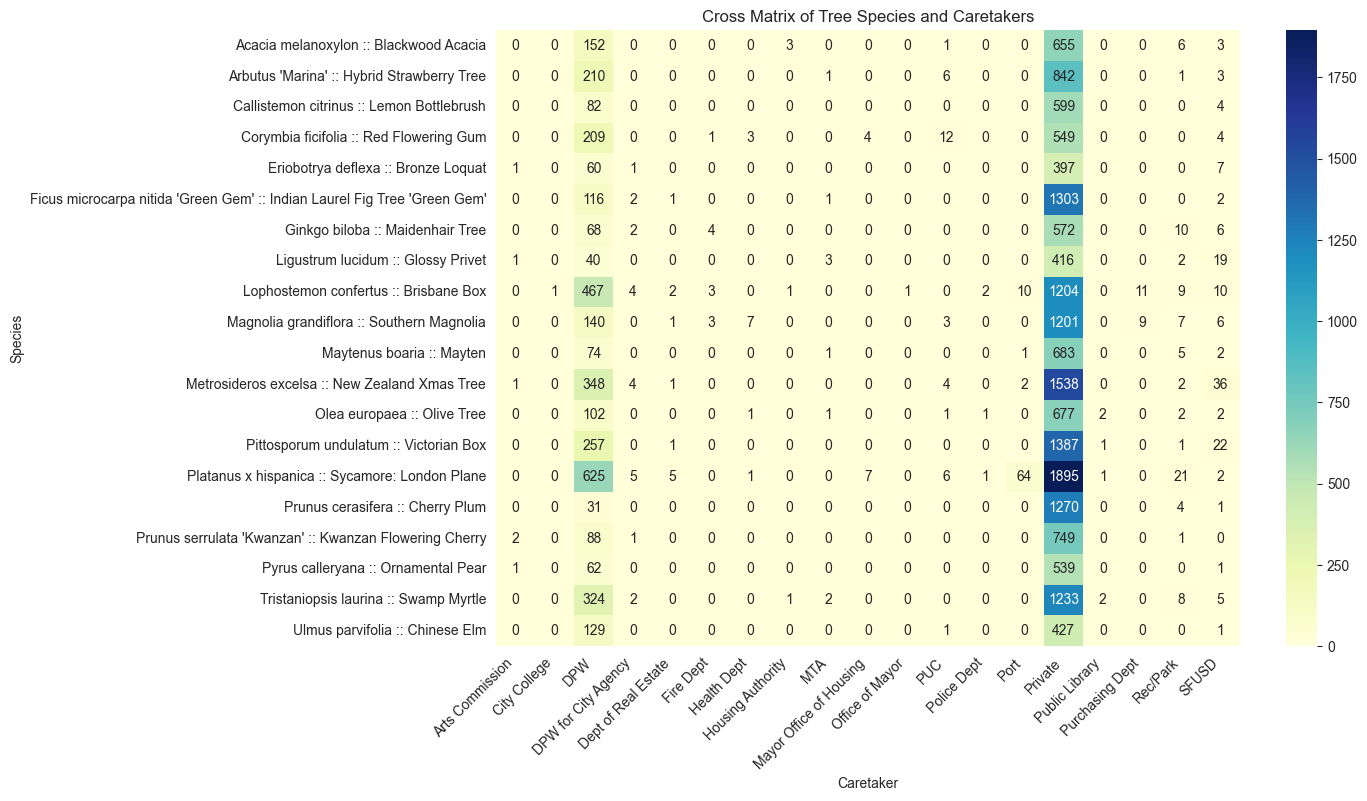

In [8]:
import seaborn as sns

df2 = df.copy()
# df2 = df2[df2['qCaretaker'] != 'Private']

# Reattempting the creation of a cross matrix (heatmap) for species and caretaker
# Selecting the top 10 species and top caretakers based on frequency
n = 20
top_10_species = df2['qSpecies'].value_counts().head(n).index
top_caretakers = df2['qCaretaker'].value_counts().head(n).index

# Filtering the data for only the top species and caretakers
filtered_data = df2[df2['qSpecies'].isin(top_10_species) & df2['qCaretaker'].isin(top_caretakers)]

# Creating a pivot table for the heatmap
pivot_table = pd.crosstab(filtered_data['qSpecies'], filtered_data['qCaretaker'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Cross Matrix of Tree Species and Caretakers')
plt.xlabel('Caretaker')
plt.ylabel('Species')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [35]:
# Normalizing species counts by the percentage of each caretaker

def cross_matrix(df, col1, col2):
    # Creating a pivot table for the cross matrix
    pivot_table = pd.crosstab(df[col1], df[col2])
    
    # Normalizing the counts by the percentage of each caretaker
    normalized_pivot = pivot_table #.div(pivot_table.sum(axis=0), axis=1)
    
    
    # Plotting the normalized heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(normalized_pivot, annot=True, cmap="YlGnBu", fmt='.2f')
    plt.title(f'Normalized Cross Matrix of {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


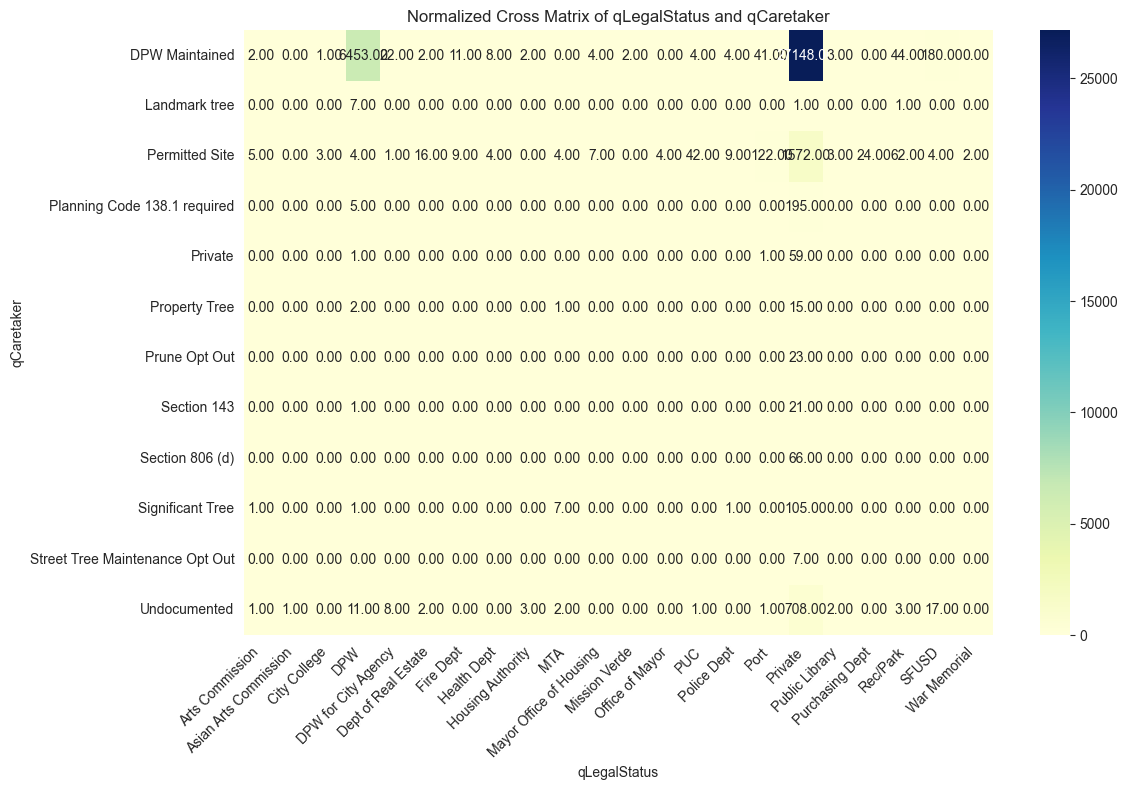

In [36]:
col1, col2 = 'qLegalStatus', 'qCaretaker'

cross_matrix(df, col1, col2)

In [37]:
df.qCaretaker.value_counts()

qCaretaker
Private                    29920
DPW                         6494
SFUSD                        201
Port                         165
Rec/Park                     110
PUC                           47
DPW for City Agency           31
Purchasing Dept               24
Fire Dept                     20
Dept of Real Estate           20
Police Dept                   14
MTA                           14
Health Dept                   12
Mayor Office of Housing       11
Arts Commission                9
Public Library                 8
Housing Authority              5
Office of Mayor                4
City College                   4
Mission Verde                  2
War Memorial                   2
Asian Arts Commission          1
Name: count, dtype: int64

In [7]:
def map_categories_to_colors(df, col_name):
    categories = df[col_name].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
    color_map = dict(zip(categories, colors))
    hex_colors = [mpl.colors.to_hex(color_map[category]) for category in df[col_name]]
    return hex_colors


def create_scatter_plot(df, x_col, y_col, color_col, scale='linear', cmap='viridis'):
    plt.figure(figsize=(10, 6))  # Set the plot size
    
    # Determine the type of color scale
    if scale == 'linear':
        norm = colors.Normalize(vmin=df[color_col].min(), vmax=df[color_col].max())
    elif scale == 'log':
        norm = colors.LogNorm(vmin=df[color_col].min(), vmax=df[color_col].max())
    elif scale == 'categorical':
        color_values = map_categories_to_colors(df, color_col)
        plt.scatter(x=df[x_col], y=df[y_col], c=color_values, s=0.05)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f"Colored by {color_col.capitalize()}")
        plt.show()
        return
    
    # Create a scatter plot for linear or log scale
    plt.scatter(
        x=df[x_col],
        y=df[y_col],
        c=df[color_col],  # Use the actual values for color
        cmap=cmap,  # Colormap
        norm=norm,  # Normalization of color values
        s=0.05,  # Size of each point
    )
    
    plt.colorbar()  # Add a color bar to the side of the plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Scatter Plot of {y_col} vs {x_col}, {scale}ly colored by {color_col}")
    plt.show()

In [14]:
df["PlantDate"].min()

Timestamp('1955-01-01 00:00:00')

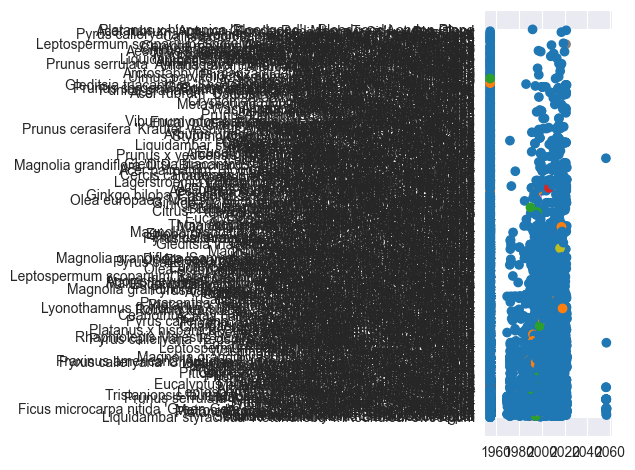

In [10]:
plt.scatter(
    y=df.qSpecies,
    x=df.PlantDate,
    c=map_categories_to_colors(df, 'qCaretaker')
)

plt.tight_layout()
plt.show(
    
)

<Axes: >

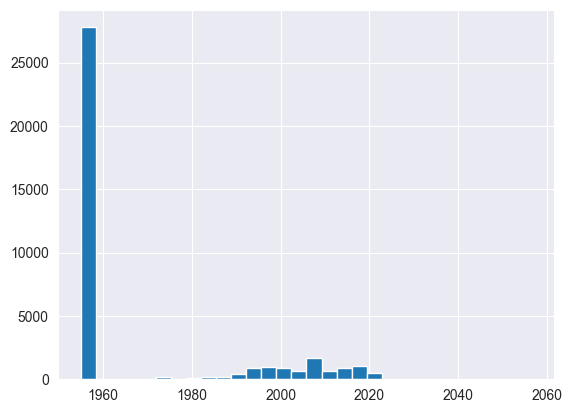

In [15]:
df.PlantDate.hist(bins=30)

In [28]:
df[df['qCaretaker'] == 'Private']

TreeID    qLegalStatus  \
0      200311  DPW Maintained   
2       43163  DPW Maintained   
3      188921  DPW Maintained   
4         643  DPW Maintained   
5      195969  DPW Maintained   
...       ...             ...   
37113  141243  DPW Maintained   
37114  203553  DPW Maintained   
37115   61778  DPW Maintained   
37116  190242  DPW Maintained   
37117  192307  DPW Maintained   

                                                qSpecies  \
0      Liquidambar styraciflua 'Rotundiloba' :: Round...   
2                 Acacia melanoxylon :: Blackwood Acacia   
3              Callistemon citrinus :: Lemon Bottlebrush   
4                     Ficus microcarpa :: Chinese Banyan   
5             Populus nigra 'Italica' :: Lombardy Poplar   
...                                                  ...   
37113          Magnolia grandiflora :: Southern Magnolia   
37114               Agonis flexuosa :: Peppermint Willow   
37115                Eriobotrya deflexa :: Bronze Loquat   
37116  Ficus microcarpa nitida 'Green Gem' :: Indian ...   
37117                            Fraxinus spp :: Ash Spp   

                   qAddress  SiteOrder                       qSiteInfo  \
0              300 Spear St        9.0      Sidewalk: Curb side : Yard   
2            222 Madison St        1.0    Sidewalk: Curb side : Cutout   
3              2001 25th St       16.0  Sidewalk: Property side : Yard   
4              3224 24th St        1.0    Sidewalk: Curb side : Cutout   
5             200 Tulare St       15.0                Back Yard : Yard   
...                     ...        ...                             ...   
37113   31 COMMONWEALTH AVE        1.0      Sidewalk: Curb side : Yard   
37114         259 Faxon Ave        1.0    Sidewalk: Curb side : Cutout   
37115          2219 24th St        1.0    Sidewalk: Curb side : Cutout   
37116  60 New Montgomery St        3.0       Sidewalk: Curb side : Pot   
37117        100 De Haro St        1.0    Sidewalk: Curb side : Cutout   

      qCaretaker  PlantDate  DBH   PlotSize   Latitude   Longitude  \
0        Private 1955-01-01    5        NaN  37.789193 -122.390006   
2        Private 2000-07-11    8        NaN  37.726036 -122.422690   
3        Private 1955-01-01    6  Width 8ft  37.751955 -122.399482   
4        Private 1955-01-01   18        3x3  37.752398 -122.416772   
5        Private 1955-01-01    8        NaN  37.747961 -122.389434   
...          ...        ...  ...        ...        ...         ...   
37113    Private 1955-01-01   10  Width 0ft  37.785434 -122.455909   
37114    Private 1955-01-01    2  Width 3ft  37.719278 -122.460296   
37115    Private 1985-01-22   13        NaN  37.753203 -122.401882   
37116    Private 1955-01-01    2  Width 3ft  37.788459 -122.401854   
37117    Private 1955-01-01   12  Width 4ft  37.767303 -122.401956   

             PlantDateInt  
0     -473385600000000000  
2      963273600000000000  
3     -473385600000000000  
4     -473385600000000000  
5     -473385600000000000  
...                   ...  
37113 -473385600000000000  
37114 -473385600000000000  
37115  475200000000000000  
37116 -473385600000000000  
37117 -473385600000000000  

[29920 rows x 13 columns]

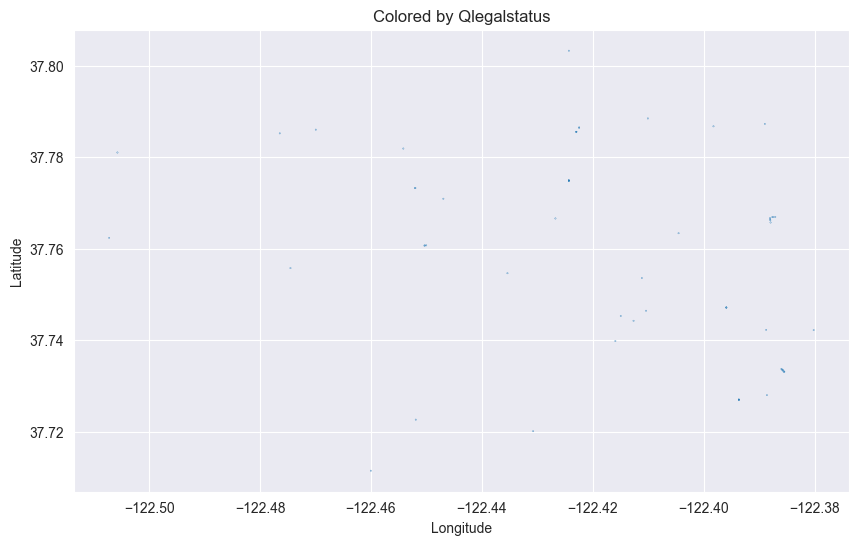

In [25]:
create_scatter_plot(df[df['qLegalStatus'] == 'Private'], 'Longitude', 'Latitude', 'qLegalStatus', scale='categorical')

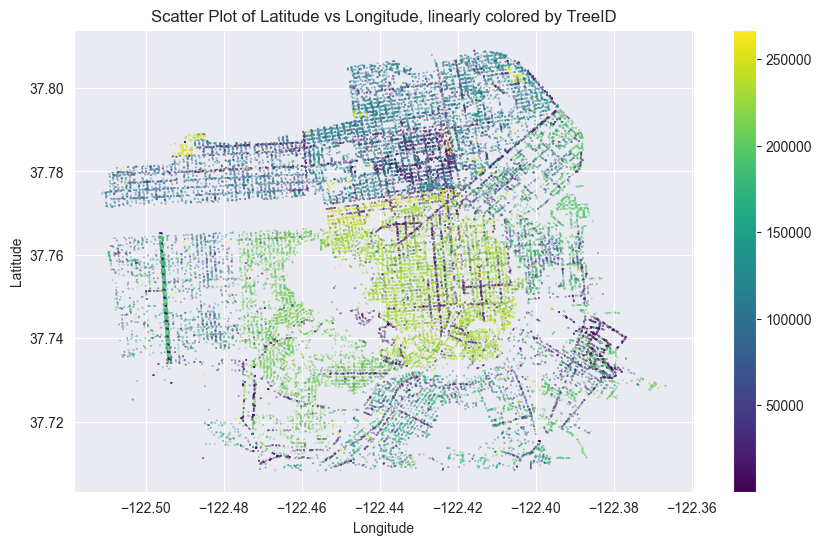

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

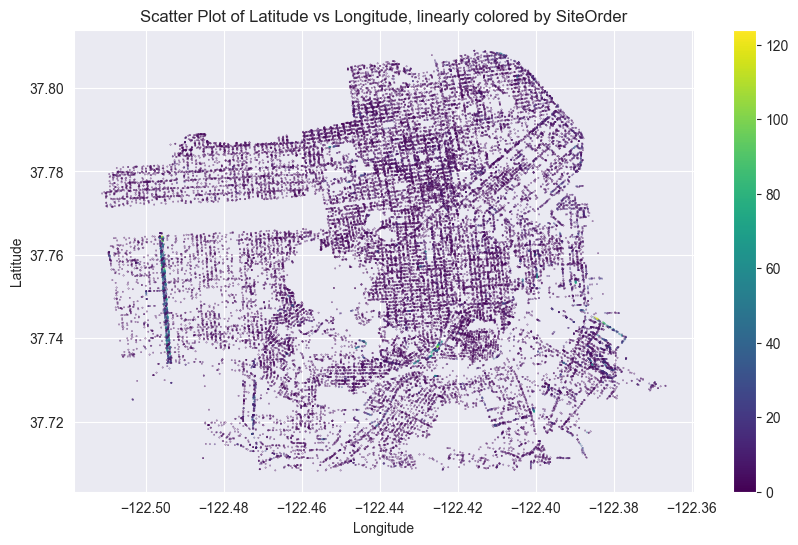

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

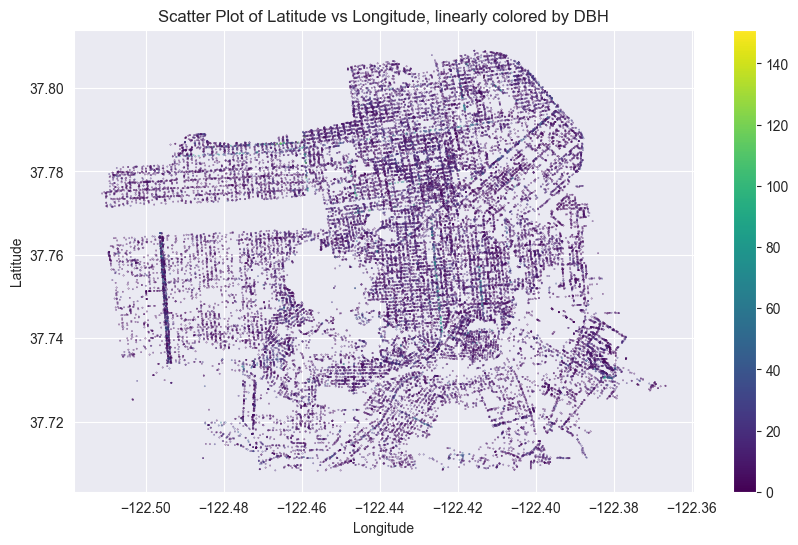

<Figure size 1000x600 with 0 Axes>

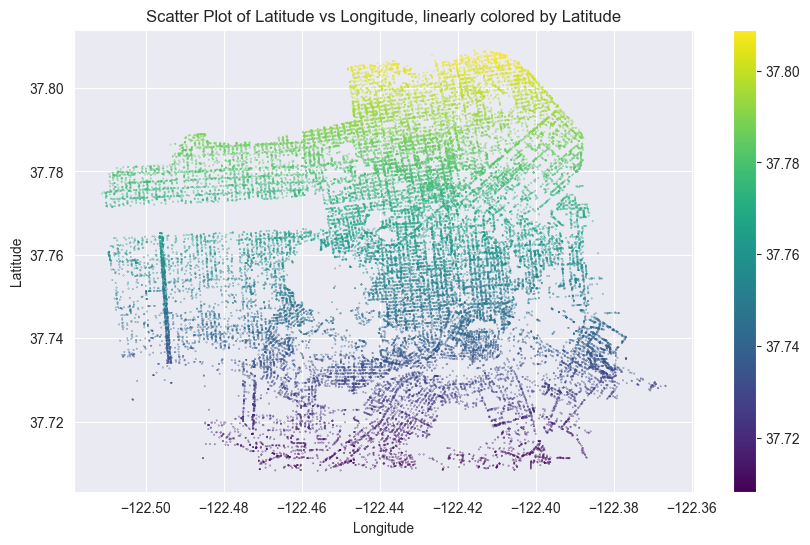

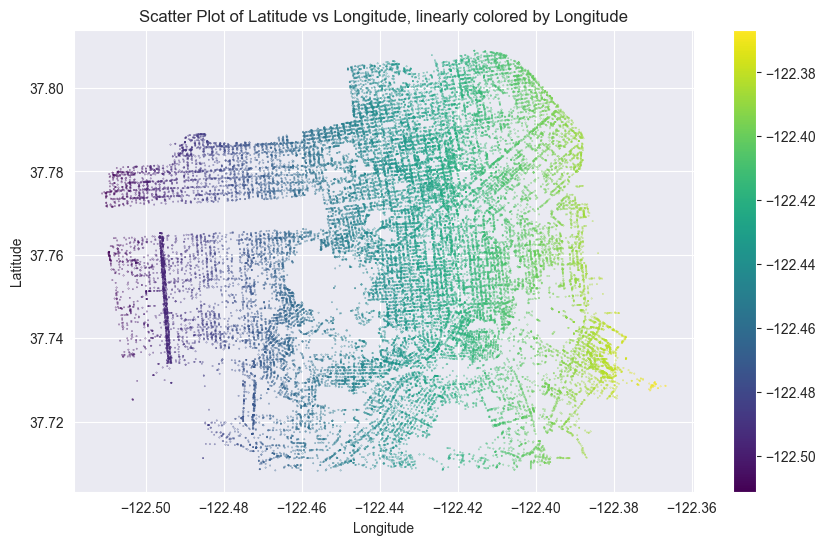

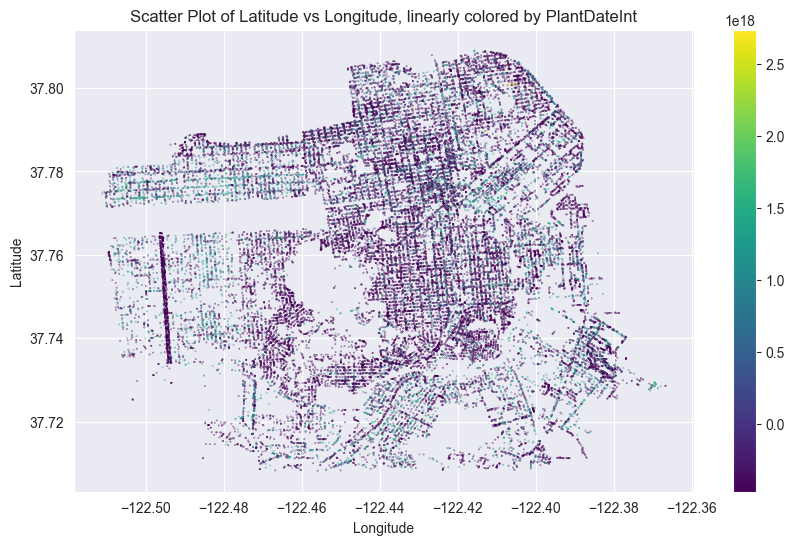

In [29]:
for col in df.columns:
    try:
        create_scatter_plot(df, 'Longitude', 'Latitude', col, scale='linear')
        
    except:
        pass


In [54]:
def linePlot(df, dateCol):
    countDf = df.groupby(df[dateCol]).count()
    display(countDf)

In [57]:
linePlot(df[df['PlantDate'] > '1955-01-01'], 'PlantDate')

TreeID  qLegalStatus  qSpecies  qAddress  SiteOrder  qSiteInfo  \
PlantDate                                                                    
1969-08-21       1             1         1         1          1          1   
1969-08-25       1             1         1         1          1          1   
1969-10-13       1             1         1         1          1          1   
1969-10-16       1             1         1         1          1          1   
1969-10-24       1             1         1         1          1          1   
...            ...           ...       ...       ...        ...        ...   
2056-05-11      11            11        11        11         11         11   
2056-06-14       3             3         3         3          3          3   
2056-07-06       1             1         1         1          1          1   
2056-07-24       1             1         1         1          1          1   
2056-09-05       2             2         2         2          2          2   

            qCaretaker  DBH  PlotSize  Latitude  Longitude  PlantDateInt  
PlantDate                                                                 
1969-08-21           1    1         1         1          1             1  
1969-08-25           1    1         0         1          1             1  
1969-10-13           1    1         0         1          1             1  
1969-10-16           1    1         0         1          1             1  
1969-10-24           1    1         0         1          1             1  
...                ...  ...       ...       ...        ...           ...  
2056-05-11          11   11         2        11         11            11  
2056-06-14           3    3         0         3          3             3  
2056-07-06           1    1         0         1          1             1  
2056-07-24           1    1         0         1          1             1  
2056-09-05           2    2         0         2          2             2  

[3755 rows x 12 columns]

<Axes: >

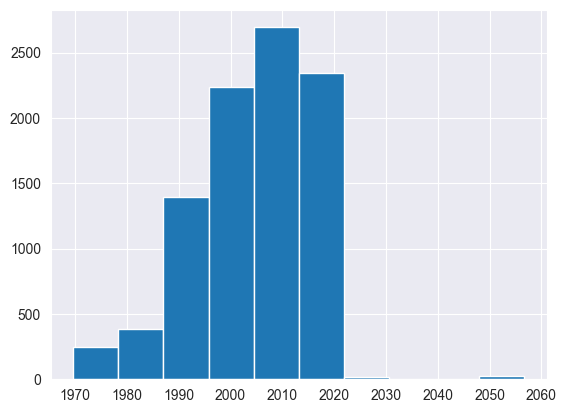

In [62]:
df[df['PlantDate'] > '1955-01-01'].PlantDate.hist()

TypeError: 'value' must be an instance of str or bytes, not a float

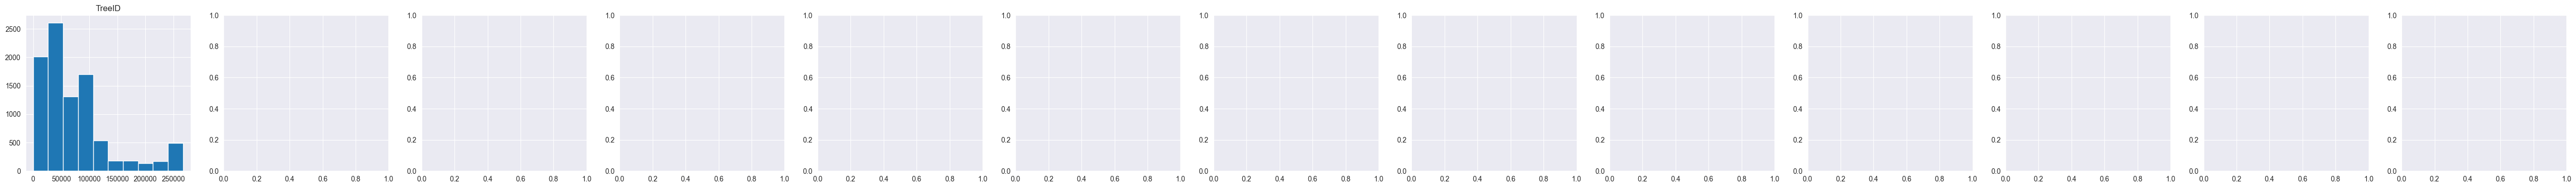

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it already includes a 'PlantDate' column in datetime format.
# If 'PlantDate' is not in datetime format, convert it first:
# df['PlantDate'] = pd.to_datetime(df['PlantDate'])

# Sample DataFrame creation (this is just for demonstration; replace it with your actual DataFrame)
# df = pd.DataFrame({
#     'PlantDate': pd.date_range(start='1950-01-01', periods=100, freq='A'),
#     'Column1': np.random.randn(100),
#     'Column2': np.random.rand(100)
# })

# Filter the DataFrame to include rows where 'PlantDate' is after 1955-01-01
filtered_df = df[df['PlantDate'] > pd.Timestamp('1955-01-01')]

# Determine the number of columns
columns_to_plot = filtered_df.columns  # This includes 'PlantDate'
n_cols = len(columns_to_plot)

# Create a figure and axes with 1 row and n_cols columns
fig, axs = plt.subplots(1, n_cols, figsize=(5 * n_cols, 4))

# Check if axs is an array (happens when n_cols > 1)
if isinstance(axs, np.ndarray):
    for ax, column in zip(axs, columns_to_plot):
        # Special handling for 'PlantDate' to convert datetime to numeric for histogram
        if column == 'PlantDate':
            ax.hist(pd.to_numeric(filtered_df[column]))
            ax.set_title(column)
            # Optional: Convert the x-axis back to dates for readability
            ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Adjust the number of ticks shown
            ax.tick_params(axis='x', rotation=45)  # Rotate tick labels for better readability
        else:
            ax.hist(filtered_df[column])
            ax.set_title(column)
else:
    # If there's only one column, it's not an array
    axs.hist(filtered_df[columns_to_plot[0]])
    axs.set_title(columns_to_plot[0])

plt.tight_layout()
plt.show()
